
# Project: Investigate a "No-show appointments" Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>  
</ul>

<a id='intro'></a>
## Introduction
This dataset `No-Show Appointments` collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● `ScheduledDay` tells us on
what day the patient set up their
appointment.

● `Neighborhood` indicates the
location of the hospital.

● `Scholarship` indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the `last column`: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

We will analyze and explore the No-Show Appointments dataset to work throw it and we tring to answer this questions by exploring the dataset and also the connections among variables.
And after that, come up with possible conclusions as to why so many patients do not show up to their appointment.

### Questions

#### <li><a href="#Q1">Q1: Does `Gender` Affect the Attendence?</a></li>
#### <li><a href="#Q2">Q2: Does `Age` Affect the Attendance?</a></li>
#### <li><a href="#Q3">Q3: Does `Neighbourhood` Affect the Attendance?</a></li>
#### <li><a href="#Q4">Q4: Does `Scholarship` Affect the Attendance?</a></li>
#### <li><a href="#Q5">Q5: Does `SMS` Affect the Attendance?</a></li>
#### <li><a href="#Q6">Q6: Does `Handicap` Affect the Attendance?</a></li>
#### <li><a href="#Q7">Q7: Does `Age and Chronic Deseases` (Diabetes, Hypertension) Affect the Attendence?</a></li>
#### <li><a href="#Q8">Q8: Does `Nighbourhood and Age` Affect the Attendance?</a></li>
#### <li><a href="#Q9">Q9: Does `Neighbourhood and SMS ` Affect the Attendance?</a></li>

In [1]:
#import statements for all of the packages that we plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# load dataset
df = pd.read_csv('NoShowAppointments-kaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#exploring the shape of data
df.shape

(110527, 14)

In [4]:
#the basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# check for duplicates in the data
df.duplicated().any()

False

No duplicated rows in our dataset

In [6]:
# check for any missing values in the data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No missing data in our dataset

In [7]:
# Number of unique PatientId
df['PatientId'].nunique()

62299

62,299 unique patient id

In [8]:
# Number of duplicated Patient Id
df['PatientId'].duplicated().sum()

48228

48,228 duplicated patient id

In [9]:
# Number of duplicated 'Patient Id' with the same 'No-show' status.
df.duplicated(['PatientId', 'No-show']).sum()

38710

● 38,710 Patient Have the Same 'no-show' status / Unnecessary Data Will be Dropped in Cleaning Stage.

In [10]:
# more information about our data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


● As shown **min age** is **-1**  / Wrong data will be dropped in **cleaning stage.**

**● 50% of Ages are between 18 and 55**

In [11]:
# check for any other age < 0 
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


### Data Cleaning 

In [12]:
# drop rows that contains age <= 0  
df = df[df.Age >= 0]
# confirm changes
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [13]:
# drop duplicates just for each 'patient id'  has the same 'No-show' status
# leaving the dupliated 'Patient Id' if they differ in the 'No-show' status.
df.drop_duplicates(['PatientId', 'No-show'], inplace=True)
# confirm changes
df.shape

(71816, 14)

In [14]:
# rename columns
df.rename(columns={'No-show': 'No_show'}, inplace=True)
df.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)
# confirm changes
df.head(0)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


In [15]:
# drop unnecessary columns
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)
# confirm changes
df.head(0)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


<a id='eda'></a>
## Exploratory Data Analysis

In [16]:
plt.style.use('bmh')

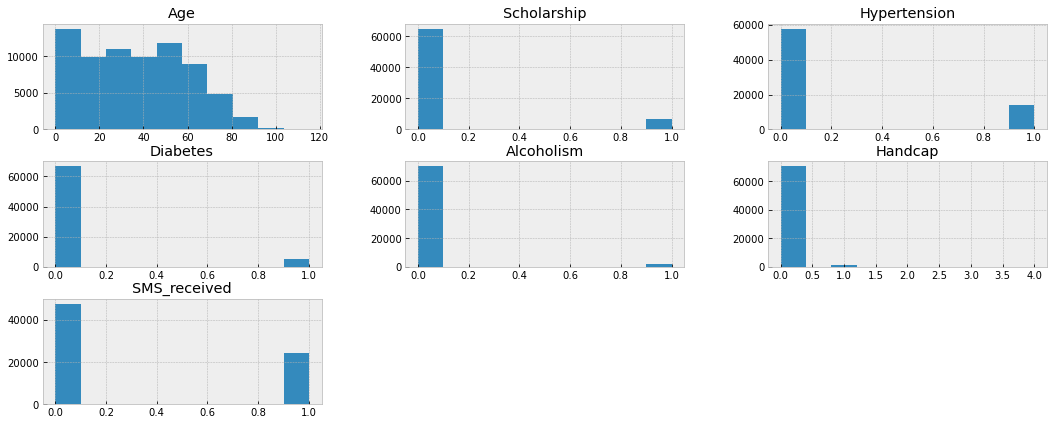

In [17]:
#general overview
df.hist(figsize=(18,7));

In [18]:
#dividing the patients to 2 groups according to attendence status
attend = df.No_show=='No'
absent = df.No_show=='Yes'

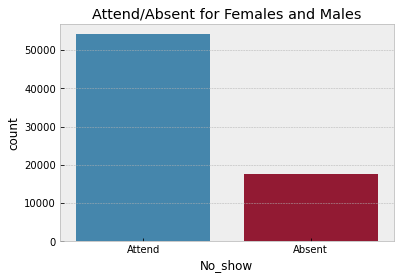

In [19]:
#lets see how many patient attend or not
ax = sns.countplot(x=df.No_show, data=df)
ax.set_title('Attend/Absent for Females and Males')
ax.set_xticklabels(['Attend', 'Absent'])
plt.show()

About **75%** of Patient **Attend** and **25% Absent**

<a id='Q1'></a>
### Q1: Does `Gender` Affect the Attendence?

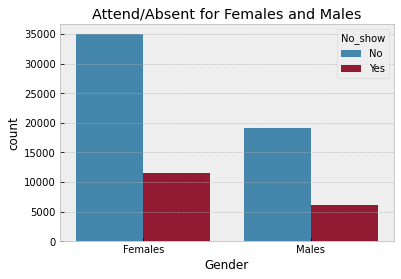

In [20]:
# Create a bar chart with proper labels To Compare the 'Attendence status' According To 'Gender'
ax = sns.countplot(x=df.Gender, hue=df.No_show, data=df)
ax.set_title('Attend/Absent for Females and Males')
ax.set_xticklabels(['Females', 'Males'])
plt.show()

● **65%** of patients are **Females** (46,466), **75%** of them **Attend** (34,960), and **25% Absent** (11,506) 

● **35%** of patients are **Mens** (25,350), **75%** of them **Attend** (19,193) and **25% Absent** (6,157)

**● The Precentage of Absence = 25% for Each Gender
● The Precentage of Attendence = 75%  for Each Gender**

● **No** Correlation Between **Gender** and **Attendence**.

<a id='Q2'></a>
### Q2: Does `Age` Affect the Attendance?

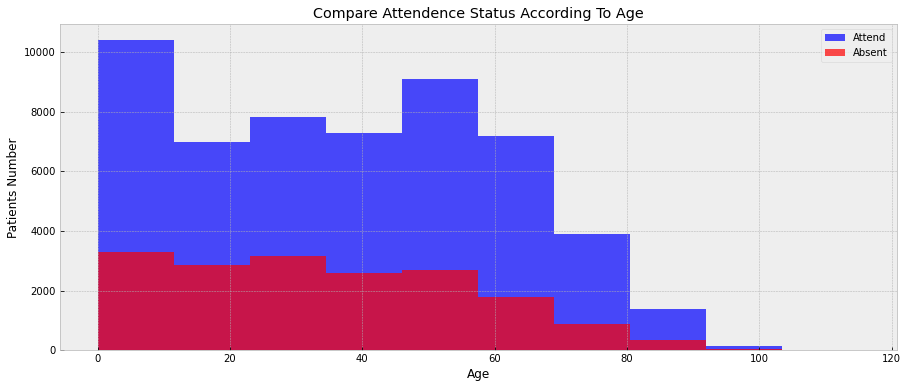

In [21]:
#creat a histogram to Compare the 'Attendence status' According To 'Age'
plt.figure(figsize=[15,6])
df[attend]['Age'].plot(kind='hist', alpha=0.7, color='blue', label='Attend')
df[absent]['Age'].plot(kind='hist', alpha=0.7, color='red', label='Absent')
plt.legend();
# Set the title and label axes 
plt.title('Compare Attendence Status According To Age')
plt.xlabel('Age')
plt.ylabel('Patients Number');


**● Ages from 0 to 10 are the Most Attendance (parents take care of their kids)**
**● Ages above 65 are the Least Attendance**

 for each age the number of attendence is bigger than the number of absence

 for older than 65 y.o patients number decreased but the num of attend is still bigger than the absent 

● **NO** Correlation Between **Age** and **Attendance**

<a id='Q3'></a>
### Q3:  Does Neighbourhood Affect the Attendance?

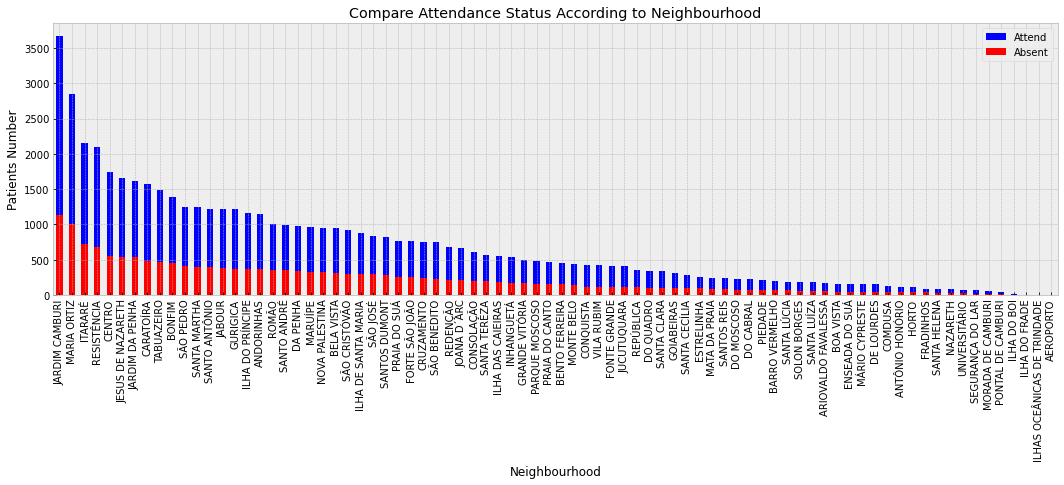

In [22]:
#creat a bar chart to Compare the 'Attendence status' According To 'Neighbourhood'
plt.figure(figsize=[18,5])
df[attend]['Neighbourhood'].value_counts().plot(kind='bar', label='Attend', color='blue')
df[absent]['Neighbourhood'].value_counts().plot(kind='bar', label='Absent', color='red')
plt.legend()
#Set the title and label axes 
plt.title('Compare Attendance Status According to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

● As we see the number of patients is **too high** in some Neighbourhoods like `'JARDIM CAMBURI'` and **too low** in others like `'AEROPORTO'`. and the same thing for the number of attendance. we don't have enough data to explain why that happened!

<a id='Q4'></a>
### Q4: Does `Scholarship` Affect the Attendance?

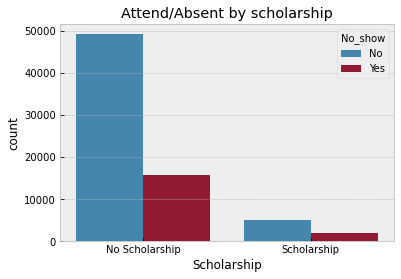

In [23]:
# Create a bar chart with proper labels to Compare the 'Attendance status' According To 'Scholarship Status'
ax = sns.countplot(x=df.Scholarship, hue=df.No_show, data=df)
ax.set_title('Attend/Absent by scholarship')
ax.set_xticklabels(['No Scholarship', 'Scholarship'])
plt.show()

● **90%** of all patients **`have no Scholarship`** = 64,955:**75% attend** = 49,207,**25% absent** = 15,748

● **10**% of all patients **`have Scholarship`** = 6,861:**72% attend** = 4,946 ,**28% absent** = 1,915

● There is **`NO`** Correlation Between **`have Scholarship or not`** and the **`Attendance`**

<a id='Q5'></a>
### Q5:  Does `SMS` Affect the Attendance?

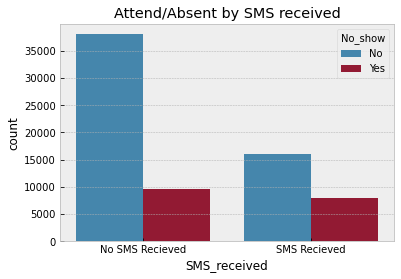

In [24]:
# Create a bar chart with proper labels
ax = sns.countplot(x=df.SMS_received, hue=df.No_show, data=df)
ax.set_title('Attend/Absent by SMS received')
x_ticks_labels=['No SMS Recieved', 'SMS Recieved']
ax.set_xticklabels(x_ticks_labels)

plt.show()

● **66%** of all patients **`Not Recieved SMS`** = 47,717 **:** **80% Attend** = 38,057 **,** **20% Absent** = 9,660

● **34%** of all patients **`Recieved SMS`** = 24,099 **:** **67% Attend** = 16,096 **,** **33% Absent** = 8,003

<a id='Q6'></a>
### Q6: Does `Handicap` Affect the Attendance?

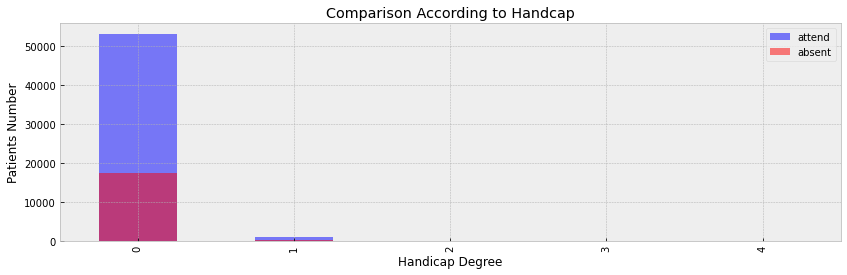

In [25]:
plt.figure(figsize=[14,4])
df[attend].Handcap.value_counts().plot(kind='bar', alpha=.5, color='blue', label='attend')
df[absent].Handcap.value_counts().plot(kind='bar', alpha=.5, color='red', label='absent')
plt.legend()
# Set the title and label axes 
plt.title('Comparison According to Handcap')
plt.xlabel('Handicap Degree')
plt.ylabel('Patients Number');

● **98%** of all patients are **`without Handcap`** = 70511 **:** **75% Attend**  = 53126 **,** **25% Absent = 17385**

<a id='Q7'></a>
### Q7:  Does `Age and Chronic Deseases` (Diabetes, Hypertension) Affect the Attendance?

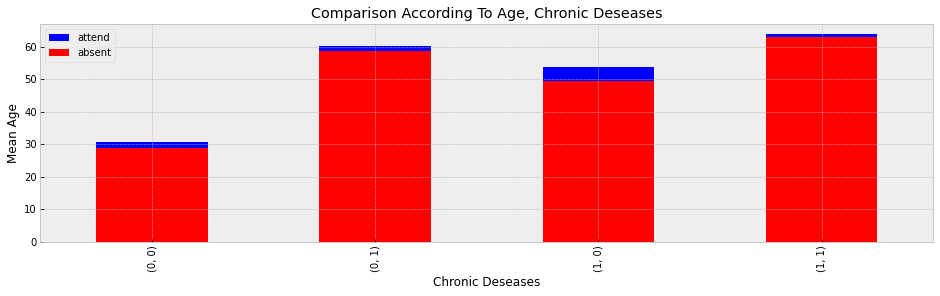

In [26]:
plt.figure(figsize=[16,4])
df[attend].groupby(['Diabetes', 'Hypertension']).Age.mean().plot(kind='bar', color='blue', label='attend')
df[absent].groupby(['Diabetes', 'Hypertension']).Age.mean().plot(kind='bar', color='red', label='absent')
plt.legend();
# Set the title and label axes 
plt.title('Comparison According To Age, Chronic Deseases')
plt.xlabel('Chronic Deseases')
plt.ylabel('Mean Age');

In [27]:
df[attend].groupby(['Diabetes', 'Hypertension']).Age.mean()

Diabetes  Hypertension
0         0               30.713360
          1               60.270517
1         0               53.701370
          1               63.764303
Name: Age, dtype: float64

In [28]:
df[absent].groupby(['Diabetes', 'Hypertension']).Age.mean()

Diabetes  Hypertension
0         0               28.768691
          1               58.650380
1         0               49.481172
          1               62.913282
Name: Age, dtype: float64

● Mean Age for **`Non Chronic Deseases Attend`** Patients is **`31`** And for **`Absent`** is **`29`**

● Mean Age for  **`Hypertensive Diabetic Attend`** Patients is **`64`** And for **`Absent`** is **`63`**

● There is **`Positive`** Correlation Between **`Age`** and **`Chronic Deseases`**

● There is **`NO`** Correlation Between **`Chronic Deseases`** and **`Attendance`**

<a id='Q8'></a>
### Q8: Does `Nighbourhood and Age` Affect the Attendance?

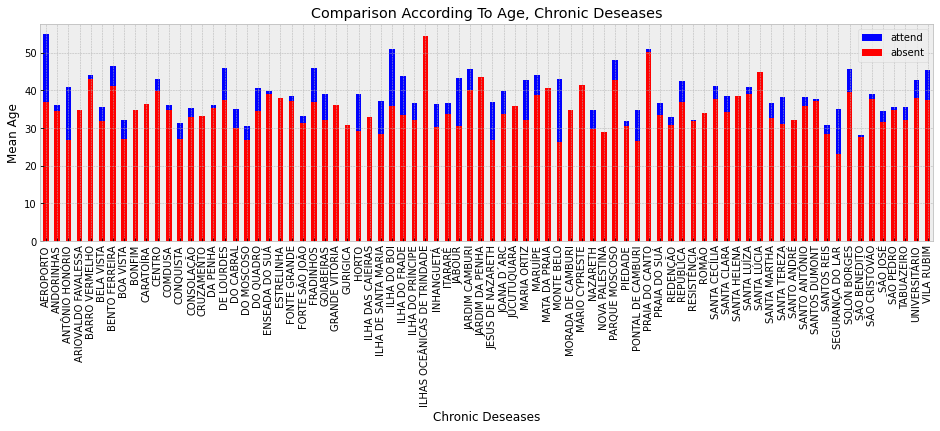

In [29]:
#creat a bar chart to Compare the Attendance status According To Neighbourhood and Age
plt.figure(figsize=[16,4])
df[attend].groupby(['Neighbourhood']).Age.mean().plot(kind='bar', color='blue', label='attend')
df[absent].groupby(['Neighbourhood']).Age.mean().plot(kind='bar', color='red', label='absent')
plt.legend();
# Set the title and label axes 
plt.title('Comparison According To Age, Chronic Deseases')
plt.xlabel('Chronic Deseases')
plt.ylabel('Mean Age');

 ● **The highest ages of those who attended ** are From **`AEROPORTO`** Then **`ILHA DO BOI`** 

<a id='Q9'></a>
### Q9:  Does `Neighbourhood and SMS ` Affect the Attendance?

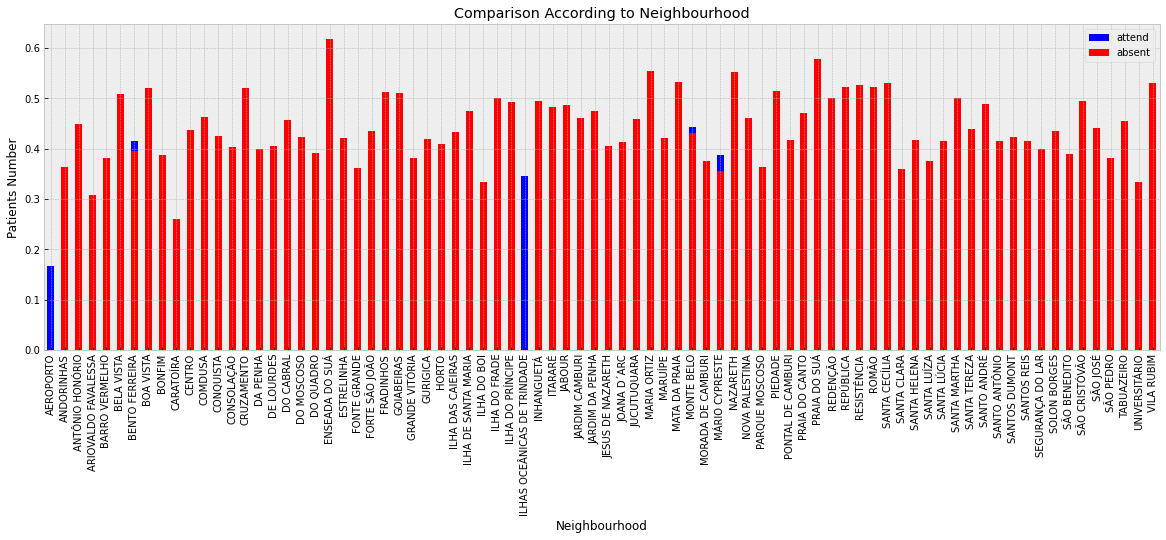

In [30]:
#creat a bar chart to Compare the 'Attendance status' According To 'Neighbourhood' and 'SMS Recienved Status'
plt.figure(figsize=[20,6])
df[attend].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar', color='blue', label='attend')
df[absent].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar', color='red', label='absent')
plt.legend()
# Set the title and label axes 
plt.title('Comparison According to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

● SMS has response in Only **`5`** Neighbourhoods   ● " **`ILHAS OCEÂNICAS DE TRINDADE` " is The Most Responsive Neighbourhoods** to SMS.

● we don't have enough data to explain why that happened!

<a id='conclusions'></a>
## Conclusions

● `Nighbourhood` has a great effect on attendance or not.  `JARDIM CAMBURI` has the greatest number of patients and also has the greatest attendence rate.

>Number of attend patients from specific nighbourhood affected by recieving SMS and Ages

● The Number of attend patients **`without`** `recieving SMS` is **greater** than attend patients **`with`** `recieving SMS`:
>● **66%** of all patients **`Not Recieved SMS`** = 47,717 **:** **80% Attend** = 38,057 **,** **20% Absent** = 9,660

>● **34%** of all patients **`Recieved SMS`** = 24,099 **:** **67% Attend** = 16,096 **,** **33% Absent** = 8,003

● There is **`NO`** Correlation Between **`have Scholarship or not`** and the **`Attandence`:**
>● **90%** of all patients **`have no Scholarship`** = 64,955 **:** **75% attend** = 49,207 **,** **25% absent** = 15,748

>● **10**% of all patients **`have Scholarship`** = 6,861 **:** **72% attend** = 4,946 **,** **28% absent** = 1,915

● There is **`Positive`** Correlation Between **`Age`** and **`Chronic Deseases`:**
>● Mean Age for **`Non Chronic Deseases Attend`** Patients is **`31`** And for **`Absent`** is **`29`**

>● Mean Age for  **`Hypertensive Diabetic Attend`** Patients is **`64`** And for **`Absent`** is **`63`**

● There is **`NO`** Correlation Between **`Chronic Deseases`** and **`Attandence`** -  
   Most of the patients are not diabetes but more than alcoholics.

● There are for handicap categories with most of the people not being handicapted.

● Most patients do not have hypertension diagnosed

● Most of the patients are not alcoholics.

## Limitation
> No clear strong correlations between factors because most of our data is categorical.

> The data isn't enough, just for three months ( April, May, June).

>There are 3% patients' ages is 0, not clear if that relates to newborns or data entry error.